In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import date
import function as fun

# # Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (9, -55)
lng_range = (-33, -81)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-55.000, high=9.000, size=1500)
lngs = np.random.uniform(low=-81.000, high=-33.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

510

In [3]:
# build URL to make API call based on weather data from 1/1/2008 - 12/1/2010
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&type=hour&start={1199145600}&end={1293753600}&q="

# Create the Lists to be used in the Dictionary for the Data Frame
name = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
min_temp = []
wind_speed = []
counter = 0

# Loop through the entire list of cities and request data for each city
for city in cities:
    try:
        city_response = requests.get(query_url + city).json()
        name.append(city_response['name'])
        country.append(city_response['sys']['country'])
        date.append(city_response['dt'])
        humidity.append(city_response['main']['humidity'])
        lat.append(city_response['coord']['lat'])
        lng.append(city_response['coord']['lon'])
        max_temp.append(city_response['main']['temp_max'])
        min_temp.append(city_response['main']['temp_min'])
        wind_speed.append(city_response['wind']['speed'])
        counter += 1
        print(f"Processing Request {counter} | {city}")
        time.sleep(2)
    except Exception:
        print(f"City not found -- Skipping: {city}")

Processing Request 1 | barcelos
Processing Request 2 | arraial do cabo
Processing Request 3 | ananas
Processing Request 4 | mar del plata
Processing Request 5 | manacapuru
Processing Request 6 | augusto correa
Processing Request 7 | urubamba
Processing Request 8 | bella vista
Processing Request 9 | ipixuna
Processing Request 10 | ilhabela
Processing Request 11 | puerto maldonado
Processing Request 12 | necochea
Processing Request 13 | cidreira
Processing Request 14 | touros
Processing Request 15 | vila velha
Processing Request 16 | saquena
Processing Request 17 | coquimbo
Processing Request 18 | rocha
Processing Request 19 | laguna
City not found -- Skipping: armacao dos buzios
Processing Request 20 | ushuaia
Processing Request 21 | comodoro rivadavia
Processing Request 22 | rawson
City not found -- Skipping: ituni
Processing Request 23 | boa vista
Processing Request 24 | coihaique
Processing Request 25 | cacador
Processing Request 26 | belmonte
City not found -- Skipping: rolim de mou

City not found -- Skipping: cumaribo
Processing Request 228 | guaxupe
Processing Request 229 | barra do corda
Processing Request 230 | itirucu
Processing Request 231 | ibate
Processing Request 232 | gualeguaychu
Processing Request 233 | ipiau
Processing Request 234 | nieuw nickerie
Processing Request 235 | tambopata
Processing Request 236 | miracema do tocantins
Processing Request 237 | camapua
Processing Request 238 | rosario
Processing Request 239 | santa helena de goias
Processing Request 240 | taltal
Processing Request 241 | requena
Processing Request 242 | villa carlos paz
Processing Request 243 | jardim
Processing Request 244 | paulista
Processing Request 245 | manaus
Processing Request 246 | tucuman
Processing Request 247 | puerto rondon
Processing Request 248 | rio cuarto
Processing Request 249 | trelew
Processing Request 250 | vista hermosa
Processing Request 251 | mutis
Processing Request 252 | loncoche
Processing Request 253 | soledade
Processing Request 254 | gualeguay
Proc

Processing Request 455 | cerqueira cesar
Processing Request 456 | olinda
Processing Request 457 | imaculada
City not found -- Skipping: tome-acu
Processing Request 458 | beberibe
Processing Request 459 | las colinas
Processing Request 460 | itacoatiara
Processing Request 461 | rubiataba
Processing Request 462 | sao desiderio
Processing Request 463 | abadiania
Processing Request 464 | pimenta bueno
Processing Request 465 | parana
Processing Request 466 | eirunepe
Processing Request 467 | itaueira
Processing Request 468 | dois vizinhos
Processing Request 469 | durazno
Processing Request 470 | curuca
Processing Request 471 | rodrigues alves
Processing Request 472 | joao monlevade
Processing Request 473 | diego de almagro
Processing Request 474 | san martin
Processing Request 475 | saquarema
Processing Request 476 | nisia floresta
Processing Request 477 | nova friburgo
Processing Request 478 | porto murtinho
Processing Request 479 | irara
Processing Request 480 | formosa do rio preto
Proce

In [15]:
SA_list = pd.DataFrame(
    {'City': name,
     'Country': country,
     'Date': date,
     'Humidity': humidity,
     'Lat': lat,
     'Lng': lng,
     'Max Temp': max_temp,
     'Min Temp': min_temp,     
     'Wind Speed': wind_speed})
     
SA_list.head(100)

,City,Country,Date,Humidity,Lat,Lng,Max Temp,Min Temp,Wind Speed
0,Barcelos,PT,1584317913,93,41.54,-8.62,44.01,39.00,1.79
1,Arraial do Cabo,BR,1584317916,82,-22.97,-42.03,78.51,78.51,23.80
2,Ananas,HT,1584317918,78,19.25,-71.96,70.97,70.97,9.04
3,Mar del Plata,AR,1584317915,87,-38.00,-57.56,61.00,55.40,2.24
4,Manacapuru,BR,1584317922,83,-3.30,-60.62,80.60,80.60,3.36
...,...,...,...,...,...,...,...,...,...
95,Acarí,PE,1584318128,91,-15.43,-74.62,67.64,67.64,3.04
96,Viloco,BO,1584318130,87,-16.95,-67.55,43.27,43.27,4.63
97,Constitución,CL,1584318133,86,-35.33,-72.42,53.10,53.10,7.00
98,Apartadó,CO,1584318135,88,7.88,-76.63,72.75,72.75,2.93


In [10]:
# load new df to csv
SA_list.to_csv(r'~/Desktop/RiceData/Homework/Projects/Data-Analysis-Project-1/Data/Kati_Data/output_data/SA_list.csv', index = False)

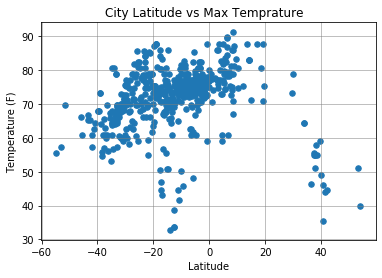

In [11]:
# create Lat vs. Max Temp correlation scatter plot
title = "City Latitude vs Max Temprature" + "  "
temp_plot = SA_list.plot.scatter(x='Lat',
                      y='Max Temp',s=30,title=title)
temp_plot.set_ylabel("Temperature (F)")
temp_plot.set_xlabel("Latitude")
temp_plot.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

# output to png
plt.savefig('output_data/lat_temp.png')

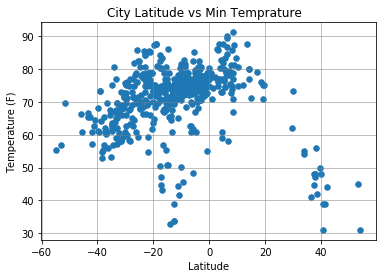

In [16]:
# create Lat vs. Min Temp correlation scatter plot
title = "City Latitude vs Min Temprature" + "  "
temp_plot = SA_list.plot.scatter(x='Lat',
                      y='Min Temp',s=30,title=title)
temp_plot.set_ylabel("Temperature (F)")
temp_plot.set_xlabel("Latitude")
temp_plot.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

# output to png
plt.savefig('output_data/lat_temp.png')

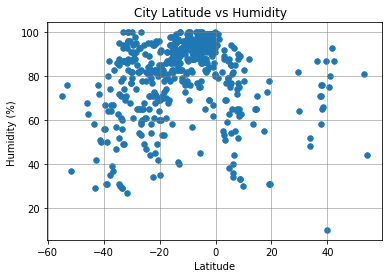

In [17]:
title = "City Latitude vs Humidity" + "  "
temp_plot = SA_list.plot.scatter(x='Lat',
                      y='Humidity',s=30,title=title)
temp_plot.set_ylabel("Humidity (%) ")
temp_plot.set_xlabel("Latitude")
temp_plot.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

# output to png
plt.savefig('output_data/lat_humidity.png')

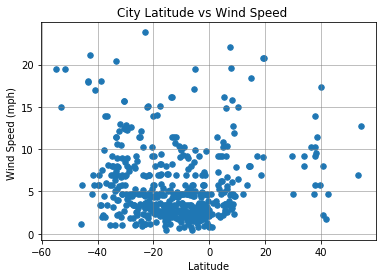

In [18]:
# create Lat vs. Wind Speed scatter plot
title = "City Latitude vs Wind Speed " + "  "
temp_plot = SA_list.plot.scatter(x='Lat',
                      y='Wind Speed',s=30,title=title)
temp_plot.set_ylabel("Wind Speed (mph) ")
temp_plot.set_xlabel("Latitude")
temp_plot.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

# output to png
plt.savefig('output_data/lat_windspeed.png')

## Linear Regression

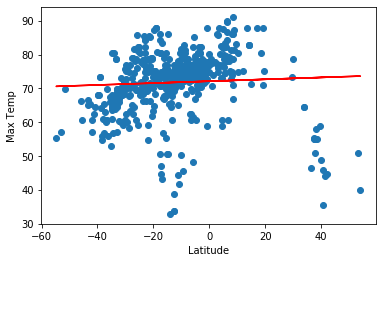

In [19]:
# create linear regressions for Northern Hemisphere - Max Temp vs. Latitude
x_values = SA_list['Lat']
y_values = SA_list['Max Temp']
fun.Lin_Reg(x_values,y_values,'Latitude','Max Temp')

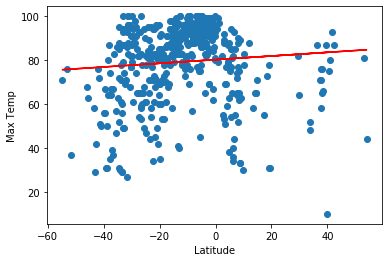

In [20]:
# create linear regressions for Humidity vs. Latitude
x_values = SA_list['Lat']
y_values = SA_list['Humidity']
fun.Lin_Reg(x_values,y_values,'Latitude','Max Temp')

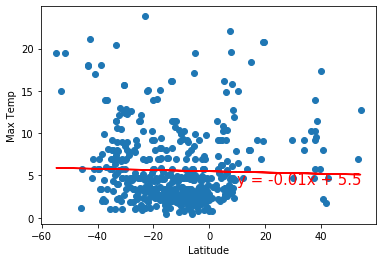

In [21]:
# create linear regressions for Wind Speed vs. Latitude
x_values = SA_list['Lat']
y_values = SA_list['Wind Speed']
fun.Lin_Reg(x_values,y_values,'Latitude','Max Temp')